In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
data = load_diabetes()

In [29]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
print(X.shape, y.shape)
print(X.head())
print(y.head())

(442, 10) (442,)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


**Train / Test split**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [31]:
def eval_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    yhat_tr = model.predict(X_train)
    yhat_te = model.predict(X_test)
    metrics = {
        "model": name,
        "train_MSE": mean_squared_error(y_train, yhat_tr),
        "test_MSE": mean_squared_error(y_test, yhat_te),
        "train_R2": r2_score(y_train, yhat_tr),
        "test_R2": r2_score(y_test, yhat_te),
    }
    return model, metrics

In [21]:
#OLS
ols = LinearRegression()
ols_model, ols_metrics = eval_model("OLS", ols, X_train, y_train, X_test, y_test)
print(ols_metrics)

{'model': 'OLS', 'train_MSE': 2924.0463790726394, 'test_MSE': 2821.750981001311, 'train_R2': 0.5244124363545944, 'test_R2': 0.4772897164322617}


In [33]:
# Cross-validate alpha automatically
alphas = np.logspace(-3, 3, 50)  
print(alphas)
ridge_cv = RidgeCV(alphas=alphas)  
ridge_model, ridge_metrics = eval_model("Ridge (CV alpha)", ridge_cv,
                                        X_train, y_train, X_test, y_test)
print(ridge_metrics)
print("Chosen alpha (λ):", ridge_model.alpha_)

[1.00000000e-03 1.32571137e-03 1.75751062e-03 2.32995181e-03
 3.08884360e-03 4.09491506e-03 5.42867544e-03 7.19685673e-03
 9.54095476e-03 1.26485522e-02 1.67683294e-02 2.22299648e-02
 2.94705170e-02 3.90693994e-02 5.17947468e-02 6.86648845e-02
 9.10298178e-02 1.20679264e-01 1.59985872e-01 2.12095089e-01
 2.81176870e-01 3.72759372e-01 4.94171336e-01 6.55128557e-01
 8.68511374e-01 1.15139540e+00 1.52641797e+00 2.02358965e+00
 2.68269580e+00 3.55648031e+00 4.71486636e+00 6.25055193e+00
 8.28642773e+00 1.09854114e+01 1.45634848e+01 1.93069773e+01
 2.55954792e+01 3.39322177e+01 4.49843267e+01 5.96362332e+01
 7.90604321e+01 1.04811313e+02 1.38949549e+02 1.84206997e+02
 2.44205309e+02 3.23745754e+02 4.29193426e+02 5.68986603e+02
 7.54312006e+02 1.00000000e+03]
{'model': 'Ridge (CV alpha)', 'train_MSE': 2953.8074338717024, 'test_MSE': 2811.1365315781536, 'train_R2': 0.5195718881181836, 'test_R2': 0.4792559713942517}
Chosen alpha (λ): 0.0517947467923121


In [23]:
# Use LassoCV to find alpha
lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 50))
lasso_model, lasso_metrics = eval_model("Lasso (CV alpha)", lasso_cv, X_train, y_train, X_test, y_test)
print(lasso_metrics)
print("Chosen alpha:", lasso_model.alpha_)

{'model': 'Lasso (CV alpha)', 'train_MSE': 2927.302799395067, 'test_MSE': 2816.4394148050865, 'train_R2': 0.5238827891443338, 'test_R2': 0.4782736481439225}
Chosen alpha: 0.005428675439323859


In [34]:
#comparing models
summary = pd.DataFrame([ols_metrics, ridge_metrics, lasso_metrics]).set_index("model")
summary

,train_MSE,test_MSE,train_R2,test_R2
model,,,,
OLS,2924.046379,2821.750981,0.524412,0.477290
Ridge (CV alpha),2953.807434,2811.136532,0.519572,0.479256
Lasso (CV alpha),2927.302799,2816.439415,0.523883,0.478274


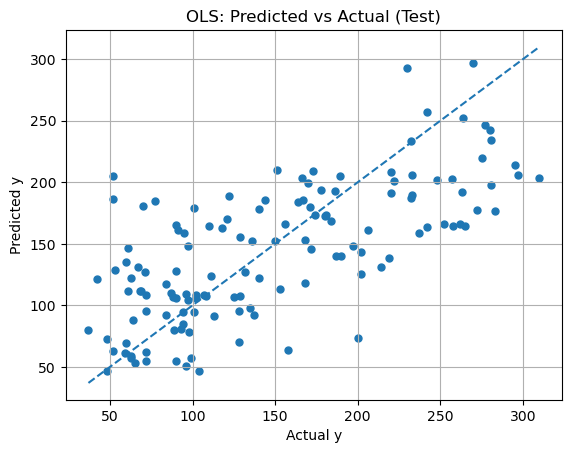

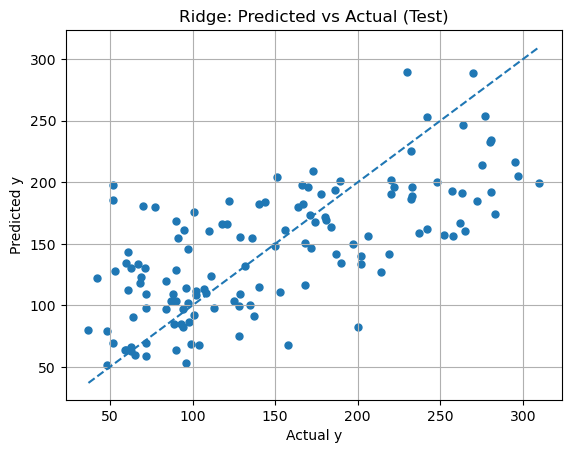

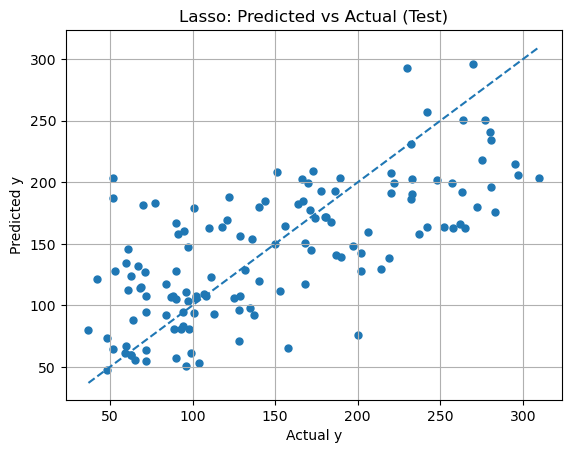

In [35]:
#Visiualiaze
def plot_pred(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, s=25)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    plt.plot(lims, lims, '--')
    plt.xlabel("Actual y")
    plt.ylabel("Predicted y")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_pred(y_test, ols_model.predict(X_test), "OLS: Predicted vs Actual (Test)")
plot_pred(y_test, ridge_model.predict(X_test), "Ridge: Predicted vs Actual (Test)")
plot_pred(y_test, lasso_model.predict(X_test), "Lasso: Predicted vs Actual (Test)")

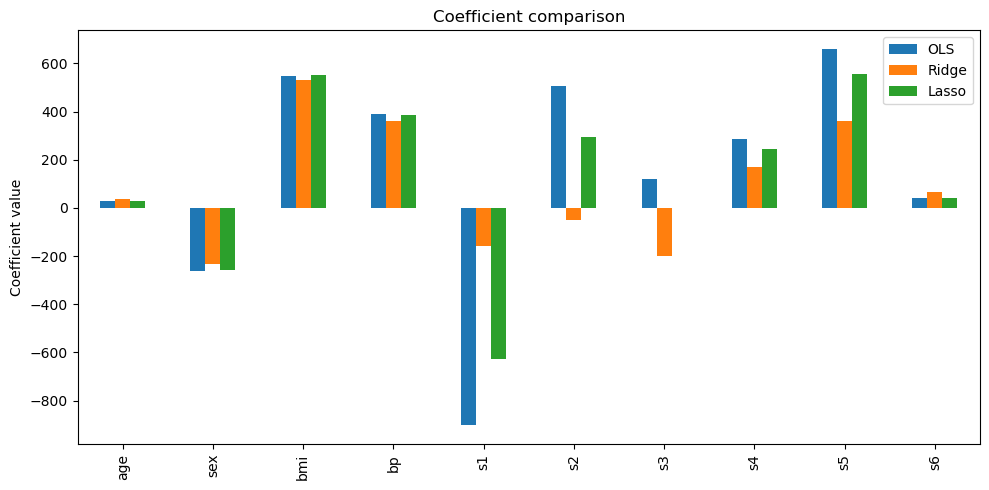

,OLS,Ridge,Lasso,is_zero_lasso
age,29.254013,37.773622,29.146415,False
sex,-261.706469,-233.385485,-255.917951,False
bmi,546.299723,530.869302,551.876476,False
bp,388.398341,359.474606,383.831620,False
s1,-901.959668,-159.238069,-628.413774,False
s2,506.763241,-49.167689,295.709233,False
s3,121.154351,-200.073254,-0.000000,True
s4,288.035267,172.047264,244.952500,False
s5,659.268951,361.137676,555.464841,False
s6,41.376701,65.889374,43.032814,False


In [36]:
#coef
coef_df = pd.DataFrame({
    "OLS": ols_model.coef_,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_,
}, index=X.columns)

coef_df.plot(kind="bar", figsize=(10,5))
plt.title("Coefficient comparison")
plt.ylabel("Coefficient value")
plt.tight_layout()
plt.show()

coef_df.assign(is_zero_lasso=coef_df["Lasso"]==0)
